In [1]:
import sys
sys.path.append('/code')

In [2]:
# Global variables
FIGURE_SIZE = (15,8)

# Histdata.com 2018 M1 data analysis
http://www.histdata.com/f-a-q/data-files-detailed-specification/
- September, october, november

In [3]:
from data_loaders.histdata_m1_data_loader import load_csv_folder
from os import path
import glob

import pandas as pd

path_list = glob.glob(path.join("/data/", '*.csv'))
path_list.sort()

data = load_csv_folder(path_list)

# data = pd.read_csv("/data/HISTDATA_COM_ASCII_USDJPY_M1201810/DAT_ASCII_USDJPY_M1_201810.csv",
#                    names=['time', "open","high", "low", "close", "volume"],
#                    nrows=100000,
#                    sep=';')

# Parse time column and set as index
data.time = pd.to_datetime(data.time, format='%Y%m%d %H%M%S')
data.set_index("time", inplace=True)

Appended /data/DAT_ASCII_USDJPY_M1_201801.csv to dataset
Appended /data/DAT_ASCII_USDJPY_M1_201802.csv to dataset
Appended /data/DAT_ASCII_USDJPY_M1_201803.csv to dataset
Appended /data/DAT_ASCII_USDJPY_M1_201804.csv to dataset
Appended /data/DAT_ASCII_USDJPY_M1_201805.csv to dataset
Appended /data/DAT_ASCII_USDJPY_M1_201806.csv to dataset
Appended /data/DAT_ASCII_USDJPY_M1_201807.csv to dataset
Appended /data/DAT_ASCII_USDJPY_M1_201808.csv to dataset
Appended /data/DAT_ASCII_USDJPY_M1_201809.csv to dataset
Appended /data/DAT_ASCII_USDJPY_M1_201810.csv to dataset
Appended /data/DAT_ASCII_USDJPY_M1_201811.csv to dataset


In [4]:
data.head()

,open,high,low,close,volume
time,,,,,
2018-01-01 17:00:00,112.645,112.645,112.645,112.645,0
2018-01-01 17:01:00,112.616,112.616,112.616,112.616,0
2018-01-01 17:02:00,112.634,112.634,112.634,112.634,0
2018-01-01 17:03:00,112.629,112.629,112.620,112.620,0
2018-01-01 17:04:00,112.619,112.625,112.613,112.613,0


In [5]:
data.describe()

,open,high,low,close,volume
count,342446.000000,342446.000000,342446.000000,342446.000000,342446.0
mean,110.281872,110.289142,110.274349,110.281802,0.0
std,2.322352,2.321496,2.323260,2.322359,0.0
min,104.630000,104.640000,104.627000,104.640000,0.0
25%,108.977000,108.986000,108.967000,108.977000,0.0
50%,110.663000,110.670000,110.656000,110.663000,0.0
75%,112.223000,112.231000,112.215000,112.223000,0.0
max,114.542000,114.548000,114.534000,114.542000,0.0


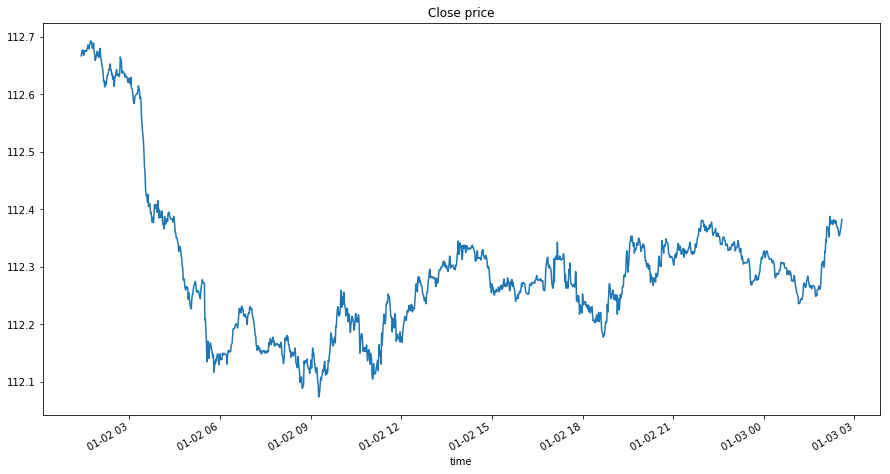

In [12]:
data[500:2000].close.plot(title='Close price', figsize=FIGURE_SIZE)

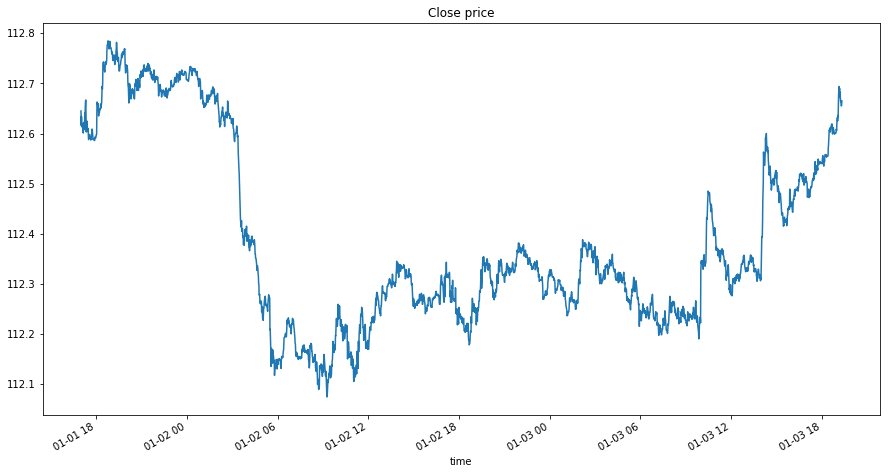

In [9]:
data[0:3000].close.plot(title='Close price', figsize=FIGURE_SIZE)

In [8]:
((data.close - data.close.mean()) / data.close.std()).describe()

count    9.304800e+04
mean    -6.021072e-15
std      1.000000e+00
min     -2.733149e+00
25%     -6.526554e-01
50%      6.986906e-02
75%      8.029843e-01
max      2.142126e+00
Name: close, dtype: float64

First value 111.342
Mean 111.078222
Max 111.37
Min 110.706
Std deviation 0.21296822214425953
Max return 0.6640000000000015
Trend (first - mean) 0.26377800000000207


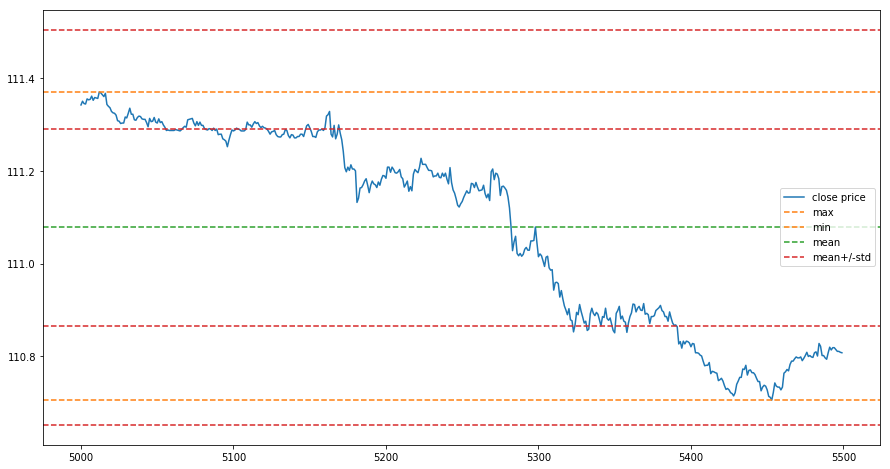

In [11]:
from matplotlib import pyplot as plt
index = 5000
extension = 100
past = 200
period_data = data.close.iloc[index : index + LENGTH]
known_past = data.close.iloc[index - past : index]

extended_period_data = data.close.iloc[index : index + LENGTH + extension]
max_price = period_data.max()
min_price = period_data.min()
max_return = max_price - min_price

plt.figure(figsize=FIGURE_SIZE)
period_data.plot(label='close price')
# plt.plot([113.90]*100)
# plt.hlines(113.90, 0, 100, colors='k', linestyles='solid', label='')
plt.axhline(y=period_data.max(), label='max', color='C1', linestyle='--')
plt.axhline(y=period_data.min(), label='min', color='C1', linestyle='--')
plt.axhline(y=period_data.mean(), label='mean', color='C2', linestyle='--')
plt.axhline(y=period_data.mean() + period_data.std(), label='mean+/-std', color='C3', linestyle='--')
plt.axhline(y=period_data.mean() - period_data.std(), color='C3', linestyle='--')
plt.axhline(y=period_data.mean() + 2 * period_data.std(), color='C3', linestyle='--')
plt.axhline(y=period_data.mean() - 2 * period_data.std(), color='C3', linestyle='--')
# plt.axhline(y=period_data.mean(), label='mean-std', color='C3', linestyle='--')
plt.legend()
print('First value', period_data.iloc[0])
print('Mean', period_data.mean())
print('Max', period_data.max())
print('Min', period_data.min())
print('Std deviation', period_data.std())
print('Max return', max_return)
print('Trend (first - mean)', period_data.iloc[0] - period_data.mean())

(array([ 14.,  56., 133.,  88.,  42.,  30.,  23.,  25.,  19.,  26.,  28.,
         15.,  40.,  41.,  20.]),
 array([110.853     , 110.87506667, 110.89713333, 110.9192    ,
        110.94126667, 110.96333333, 110.9854    , 111.00746667,
        111.02953333, 111.0516    , 111.07366667, 111.09573333,
        111.1178    , 111.13986667, 111.16193333, 111.184     ]),
 <a list of 15 Patch objects>)

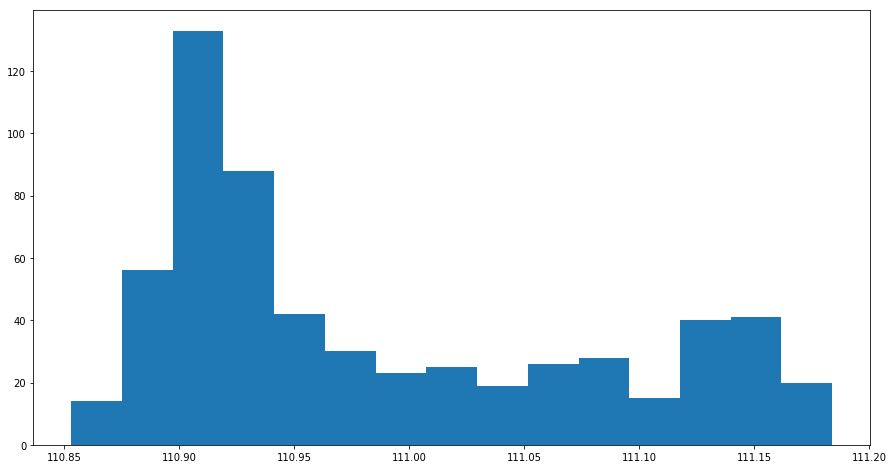

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=FIGURE_SIZE)
plt.hist(data.close.iloc[5:5 + LENGTH + 100], bins=15)

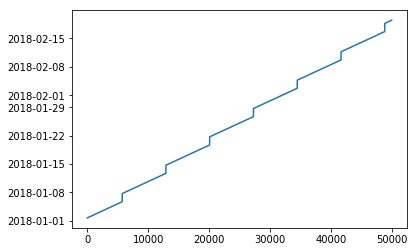

In [37]:
# indexes = [i.weekday() for i in data.index[:]]
import matplotlib.pyplot as plt
# plt.plot(indexes[:50000])
plt.plot(data.index[:50000])

# December 2018

In [6]:
test_data = pd.read_csv("/data/test/DAT_ASCII_USDJPY_M1_201812.csv",
                   names=['time', "open","high", "low", "close", "volume"],
                   nrows=100000, sep=';')

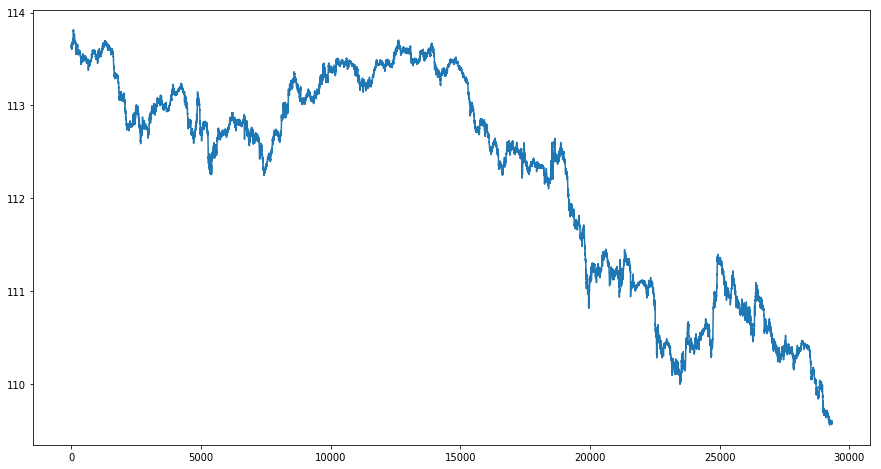

In [73]:
test_data.close.plot(figsize=FIGURE_SIZE)

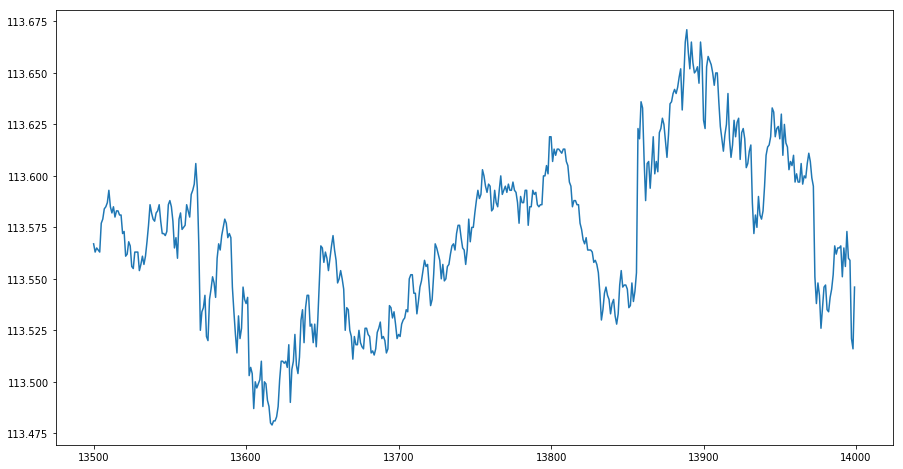

In [74]:
test_data.close[13500:14000].plot(figsize=FIGURE_SIZE)